# A quick spatial startup to explore geometry representations

Considering large computational resource requirements for whole data process, we provide simple analysis based on the processed data.

## environment setup

In [ ]:
!conda create --name geo-nav python=3.11
!conda activate geo-nav
!conda install matplotlib numpy scipy pandas
!conda install opencv

In [2]:
# suppress warnings
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# The plotting tool we will be using in this course
import matplotlib.pyplot as plt

# Module essential for data organization and manipulation
import numpy as np #numpy's "nickname" is np
import copy
from scipy import stats

num_runs = 14
num_TRs = 223
num_midlayer_units = 8
num_layer_pca_components = 20
num_deeplayers_units = num_midlayer_units + 12*num_layer_pca_components
num_semantic_categories = 10

# display the plots inline 
%matplotlib inline 
# autosave for every 5 secs
%autosave 5

Autosaving every 5 seconds


## visualize design matrix and data of srm

### load design matrix of depth

In [ ]:
from scipy.io import loadmat

matdic = loadmat("processed_data/design_matrix_alltowns_vit_pca_deeplayers_12layer_20_1latent_8.mat")

design_matrix_alltowns = matdic["design_matrix_alltowns"]
print("design matrix for all towns (n_TRs, n_latent_units) =", design_matrix_alltowns.shape)

if(np.isnan(design_matrix_alltowns).any()):
    print("design_matrix_alltowns contain NaN values")
    
## may not add zscore
design_matrix_alltowns = stats.zscore(design_matrix_alltowns, axis=0)

if(np.isnan(design_matrix_alltowns).any()):
    print("design_matrix_alltowns contain NaN values")

In [ ]:
plt.figure(figsize=(30, 20))
plt.title('Design matrix: (n_TRs, n_latent_units) ')
plt.xlabel('TR')
plt.ylabel('n_latent_units')
plt.imshow(design_matrix_alltowns.T, cmap='jet', vmin=-5, vmax=5)
# plt.colorbar()

In [ ]:
# check midlayer units
temp_data_ = design_matrix_alltowns[:,-(num_deeplayers_units+num_semantic_categories):]
temp_data = temp_data_[:,0:num_midlayer_units]

n = temp_data.shape[1]
fig, axs = plt.subplots(n, 1,figsize=(15,15))
for i in range(n):
    tmp = temp_data[:,i]
    axs[i].plot(np.arange(len(tmp)), tmp)
    # axs[i].xaxis.set_ticks(np.arange(0, 200, 25) * 1.5)

fig.tight_layout()
plt.show()

### load design matrix of roadtypes

In [ ]:
from scipy.io import loadmat

matdic = loadmat("processed_data/design_matrix_alltowns_roadtypes.mat")

design_matrix_alltowns = matdic["design_matrix_alltowns"]
print("design matrix for all towns (n_TRs, n_road_types) =", design_matrix_alltowns.shape)

if(np.isnan(design_matrix_alltowns).any()):
    print("design_matrix_alltowns contain NaN values")
    
## may not add zscore
# design_matrix_alltowns = stats.zscore(design_matrix_alltowns, axis=0)

if(np.isnan(design_matrix_alltowns).any()):
    print("design_matrix_alltowns contain NaN values")

In [ ]:
plt.figure(figsize=(30, 20))
plt.title('Design matrix: (n_TRs, n_latent_units) ')
plt.xlabel('TR')
plt.ylabel('n_latent_units')
plt.imshow(design_matrix_alltowns.T, cmap='jet', vmin=-5, vmax=5)
# plt.colorbar()

In [ ]:
# check midlayer units
temp_data_ = design_matrix_alltowns[:,-5:]
temp_data = temp_data_[:,:]

n = temp_data.shape[1]
fig, axs = plt.subplots(n, 1,figsize=(15,6))
for i in range(n):
    tmp = temp_data[:,i]
    axs[i].plot(np.arange(len(tmp)), tmp)
    # axs[i].xaxis.set_ticks(np.arange(0, 200, 25) * 1.5)

fig.tight_layout()
plt.show()

### load shared response

In [ ]:
# shared response with SRM feature dimensions determined by number of voxels in each region
from scipy.io import loadmat

matdic = loadmat("processed_data/vit_1409_dims_semgeo_shared_glm_list_optimal_hard_threshold.mat")

semgeo_shared_glm_list = matdic["semgeo_shared_glm_list"]
semgeo_shared_glm_list = semgeo_shared_glm_list[0]
print("shared response (shared_features, n_TRs) =", semgeo_shared_glm_list[0].shape)

In [ ]:
# zscore shared response - non-effective
from scipy import stats

for i_brain_region in range(len(semgeo_shared_glm_list)):
  semgeo_shared_glm_list[i_brain_region] = stats.zscore(semgeo_shared_glm_list[i_brain_region], axis=1)

  if(np.isnan(semgeo_shared_glm_list[i_brain_region]).any()):
      print("semgeo_shared_glm_list[i_brain_region] contain NaN values")

In [ ]:
plt.figure(figsize=(30, 20))
plt.title('shared response: (brain regions, n_TRs) ')
plt.xlabel('TR')
plt.ylabel('n_brain_regions')
plt.imshow(semgeo_shared_glm_list[0], cmap='jet', vmin=-5, vmax=5)
# plt.colorbar()

## explainable variance comparison between depth and roadtypes


### manually select brain regions according to three geometry pathways

name of areas and corresponding ID
1. name
early visual (V1, V2, V3),
higher visual (V4, V3A, V3B, V3CD, V6, V6A, V7, DVT, POS1, POS2, V8),
area 7 (7m, 7Pm, 7Am, 7PL, 7AL, 7PC)
IP area (IPS1, IP0, IP1, IP2, MIP, VIP, AIP, LIPv, LIPd)
precentral gyrus (PGs, PGp)
MT+ (LO1, LO2, LO3, V4t, MT, MST, FST)
medial (TPOJ1, TPOJ2, TPOJ3, STV, PSL, PF, PFt, PFcm, RI)
ventral (VMV1, VMV2, VMV3, VVC, ProS, PHA1, PHA2, PHA3, PresS, H)

2. ID
early visual (1, 4, 5),
higher visual (6, 13, 19, 158, 3, 152, 16, 142, 211, 15, 7),
area 7 (30, 29, 45, 46, 222, 227)
IP area (17, 146, 145, 144, 230, 229, 297, 48, 95)
precentral gyrus (151, 143)
MT+ (200, 201, 339, 156, 203, 2, 157)
medial (319, 320, 321, 28, 205, 148, 296, 105, 284)
ventral (333, 340, 334, 343, 121, 126, 155, 307, 119, 120)

3. merge
brain_region_name_early_visual = [V1, V2, V3]
brain_region_id_early_visual = [1, 4, 5]

brain_region_name_higher_visual = [V4, V3A, V3B, V3CD, V6, V6A, V7, DVT, POS1, POS2, V8]
brain_region_id_higher_visual = [6, 13, 19, 158, 3, 152, 16, 142, 211, 15, 7]

brain_region_name_area_7 = [7m, 7Pm, 7Am, 7PL, 7AL, 7PC]
brain_region_id_area_7 = [30, 29, 45, 46, 222, 227]

brain_region_name_IP_area = [IPS1, IP0, IP1, IP2, MIP, VIP, AIP, LIPv, LIPd]
brain_region_id_IP_area = [17, 146, 145, 144, 230, 229, 297, 48, 95]

brain_region_name_precentral_gyrus = [PGs, PGp]
brain_region_id_precentral_gyrus = [151, 143]

brain_region_name_MT_plus = [LO1, LO2, LO3, V4t, MT, MST, FST]
brain_region_id_MT_plus = [200, 201, 339, 156, 203, 2, 157]

brain_region_name_medial_visual = [TPOJ1, TPOJ2, TPOJ3, STV, PSL, PF, PFt, PFcm, RI]
brain_region_id_medial_visual = [319, 320, 321, 28, 205, 148, 296, 105, 284]

brain_region_name_ventral_visual = [VMV1, VMV2, VMV3, VVC, ProS, PHA1, PHA2, PHA3, PresS, H]
brain_region_id_ventral_visual = [333, 340, 334, 343, 121, 126, 155, 307, 119, 120]



In [2]:
# Lists of brain region names and IDs
brain_region_name_early_visual = ['V1', 'V2', 'V3']
brain_region_id_early_visual = [1, 4, 5]

brain_region_name_higher_visual = ['V4', 'V3A', 'V3B', 'V3CD', 'V6', 'V6A', 'V7', 'DVT', 'POS1', 'POS2', 'V8']
brain_region_id_higher_visual = [6, 13, 19, 158, 3, 152, 16, 142, 31, 15, 7]

brain_region_name_area_7 = ['7m', '7Pm', '7Am', '7PL', '7AL', '7PC']
brain_region_id_area_7 = [30, 29, 45, 46, 42, 47]

brain_region_name_IP_area = ['IPS1', 'IP0', 'IP1', 'IP2', 'MIP', 'VIP', 'AIP', 'LIPv', 'LIPd']
brain_region_id_IP_area = [17, 146, 145, 144, 50, 49, 117, 48, 95]

brain_region_name_precentral_gyrus = ['PGs', 'PGp']
brain_region_id_precentral_gyrus = [151, 143]

brain_region_name_MT_plus = ['LO1', 'LO2', 'LO3', 'V4t', 'MT', 'MST', 'FST']
brain_region_id_MT_plus = [20, 21, 159, 156, 23, 2, 157]

brain_region_name_medial_visual = ['TPOJ1', 'TPOJ2', 'TPOJ3', 'STV', 'PSL', 'PF', 'PFt', 'PFcm', 'RI']
brain_region_id_medial_visual = [139, 140, 141, 28, 25, 148, 116, 105, 104]

brain_region_name_ventral_visual = ['VMV1', 'VMV2', 'VMV3', 'VVC', 'ProS', 'PHA1', 'PHA2', 'PHA3', 'PresS', 'H']
brain_region_id_ventral_visual = [153, 160, 154, 163, 121, 126, 155, 127, 119, 120]

selected_brain_region_name_list = (
    brain_region_name_early_visual +
    brain_region_name_higher_visual +
    brain_region_name_area_7 +
    brain_region_name_IP_area +
    brain_region_name_precentral_gyrus +
    brain_region_name_MT_plus +
    brain_region_name_medial_visual +
    brain_region_name_ventral_visual
)
selected_brain_region_id_list = (
    brain_region_id_early_visual +
    brain_region_id_higher_visual +
    brain_region_id_area_7 +
    brain_region_id_IP_area +
    brain_region_id_precentral_gyrus +
    brain_region_id_MT_plus +
    brain_region_id_medial_visual +
    brain_region_id_ventral_visual
)

### comparison between depth and roadtypes

#### load explainbale variance of depth

In [3]:
from scipy.io import loadmat

matdic = loadmat("processed_data/depth_explainable_variance_brain_regions.mat")
depth_explainable_variance_brain_regions = np.squeeze(matdic["explained_variance_midlayer_geometry"])

print("depth_explainable_variance_brain_regions max value:", np.max(depth_explainable_variance_brain_regions))


depth_explainable_variance_brain_regions max value: 0.05083378849080111


#### load explainbale variance of roadtypes

In [4]:
from scipy.io import loadmat

matdic = loadmat("processed_data/roadtypes_explainable_variance_brain_regions.mat")
roadtypes_explainable_variance_brain_regions = np.squeeze(matdic["explained_variance_roadtypes"])

print("roadtypes_explainable_variance_brain_regions max value:", np.max(roadtypes_explainable_variance_brain_regions))

roadtypes_explainable_variance_brain_regions max value: 0.10551893716742489


### plot

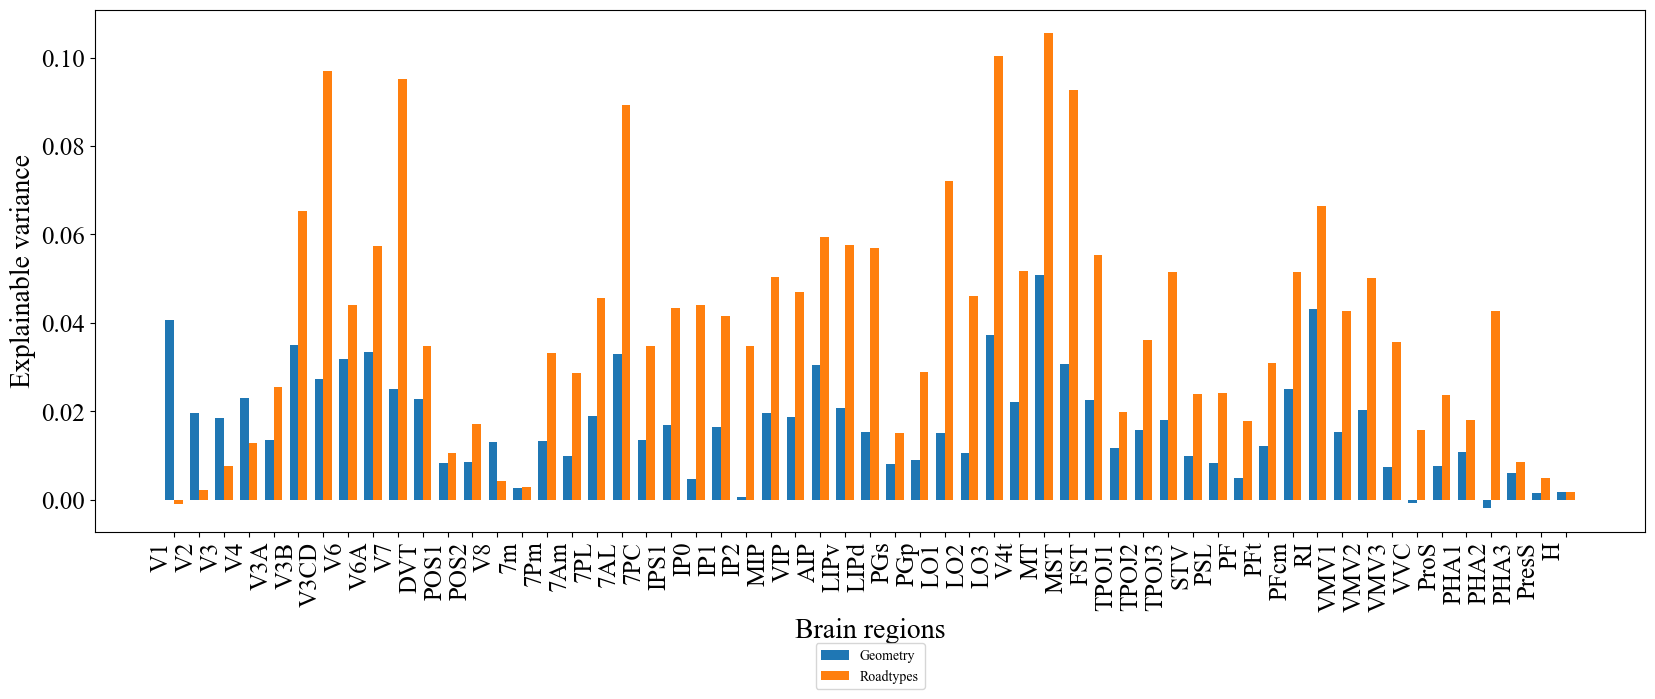

In [6]:
import numpy as np
import copy 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

# Sample data
categories = selected_brain_region_name_list

shifted_selected_brain_region_id_list = [x - 1 for x in selected_brain_region_id_list]

group1_values = copy.deepcopy(depth_explainable_variance_brain_regions)
group1_values = group1_values[shifted_selected_brain_region_id_list]

group2_values = copy.deepcopy(roadtypes_explainable_variance_brain_regions)
group2_values = group2_values[shifted_selected_brain_region_id_list]

# Calculate the width for each group
bar_width = 0.35

# Create an array of indices for the x-axis ticks
x = np.arange(len(categories))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(20,9))

# Plot the bars for Group 1
ax.bar(x - bar_width/2, group1_values, bar_width, label='Geometry')

# Plot the bars for Group 2
ax.bar(x + bar_width/2, group2_values, bar_width, label='Roadtypes')

# Set labels, title, and legend
ax.set_xlabel('Brain regions', fontsize=20)
ax.set_ylabel('Explainable variance', fontsize=20)
# ax.set_title('Grouped Bar Chart')

ax.tick_params(axis='y', labelsize=18)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=18)
ax.legend(bbox_to_anchor=(0.5, -0.2),loc='upper center')
plt.subplots_adjust(bottom=0.3)  # Adjust the value as needed
# plt.subplots_adjust(left=0.0, right=1.0)

# Display the plot
plt.show()
fig.savefig('imgs/ev_comparison_bewteen_depth_and_roadtypes.svg', dpi=500)


## decoding of depth structures


### load images of rgb, groundtruth depth, and decoded depth

In [3]:
from scipy.io import loadmat

matdic = loadmat("processed_data/paired_gt_rgb_decoding_and_depth.mat")
town07_rgb_images = np.squeeze(matdic["town07_rgb_images"])
town07_groundtruth_depth_images = np.squeeze(matdic["town07_depth_images"])
town07_decoded_depth_images = np.squeeze(matdic["town07_recon_images"])
gt_decoding_pair_indices = np.squeeze(matdic["gt_pred_pair_indices"])

print("town07_rgb_images shape:", town07_rgb_images.shape)
print("town07_groundtruth_depth_images shape:", town07_groundtruth_depth_images.shape)
print("town07_decoded_depth_images shape:", town07_decoded_depth_images.shape)
print("gt_decoding_pair_indices shape:", gt_decoding_pair_indices.shape)


town07_rgb_images shape: (200, 320, 640, 3)
town07_groundtruth_depth_images shape: (200, 320, 640)
town07_decoded_depth_images shape: (200, 320, 640)
gt_decoding_pair_indices shape: (200, 200)


### display

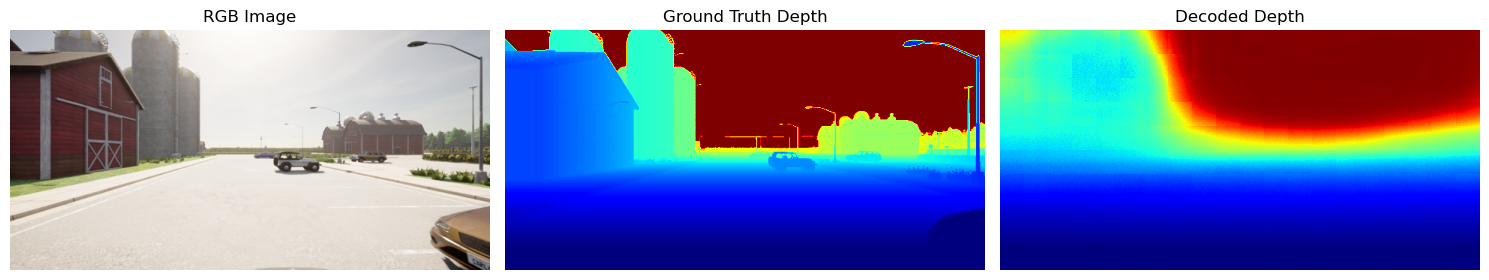

In [9]:
import matplotlib.pyplot as plt

# Select an index to display
index = 20

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the RGB image
axes[0].imshow(town07_rgb_images[index])
axes[0].set_title('RGB Image')
axes[0].axis('off')

# Display the ground truth depth image
im1 = axes[1].imshow(town07_groundtruth_depth_images[index], cmap='jet')
axes[1].set_title('Ground Truth Depth')
axes[1].axis('off')

# Display the decoded depth image
i_matched_index = gt_decoding_pair_indices[index][0]
im2 = axes[2].imshow(town07_decoded_depth_images[i_matched_index], cmap='jet')
axes[2].set_title('Decoded Depth')
axes[2].axis('off')

# Add colorbars for the depth images
# fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
# fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()

### save as videos

In [6]:
import os
import cv2
import numpy as np

# Folder to save videos
output_folder = 'output_videos'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Calculate the FPS
num_frames = town07_rgb_images.shape[0]
duration_sec = 30
fps = num_frames / duration_sec

# Define the video codec and create VideoWriter objects
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4

# Video writer for RGB images
out_rgb = cv2.VideoWriter(os.path.join(output_folder, 'town07_rgb_images.mp4'), fourcc, fps, (640, 320))

# Video writer for ground truth depth images
out_gt_depth = cv2.VideoWriter(os.path.join(output_folder, 'town07_groundtruth_depth_images.mp4'), fourcc, fps, (640, 320))

# Video writer for decoded depth images
out_decoded_depth = cv2.VideoWriter(os.path.join(output_folder, 'town07_decoded_depth_images.mp4'), fourcc, fps, (640, 320))

# Write frames to the video files
for i in range(num_frames):

    i_matched_index = gt_decoding_pair_indices[i][0]
    
    print("gt TR index:", i, "matched TR index:", i_matched_index)

    # Write RGB image frame
    rgb_frame = cv2.cvtColor(town07_rgb_images[i], cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    out_rgb.write(rgb_frame)
    
    # Write ground truth depth image frame
    gt_depth_frame = cv2.normalize(town07_groundtruth_depth_images[i], None, 0, 255, cv2.NORM_MINMAX)
    gt_depth_frame = np.uint8(gt_depth_frame)
    gt_depth_frame_colored = cv2.applyColorMap(gt_depth_frame, cv2.COLORMAP_VIRIDIS)
    out_gt_depth.write(gt_depth_frame_colored)
    
    # Write decoded depth image frame
    decoded_depth_frame = cv2.normalize(town07_decoded_depth_images[i_matched_index], None, 0, 255, cv2.NORM_MINMAX)
    decoded_depth_frame = np.uint8(decoded_depth_frame)
    decoded_depth_frame_colored = cv2.applyColorMap(decoded_depth_frame, cv2.COLORMAP_VIRIDIS)
    out_decoded_depth.write(decoded_depth_frame_colored)

# Release the video writers
out_rgb.release()
out_gt_depth.release()
out_decoded_depth.release()

print("Videos have been saved successfully.")


(<unknown>:11421): GStreamer-CRITICAL **: 10:43:58.341: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@78.003] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements

(<unknown>:11421): GStreamer-CRITICAL **: 10:43:58.356: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@78.006] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements

(<unknown>:11421): GStreamer-CRITICAL **: 10:43:58.356: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@78.007] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/ca

gt TR index: 0 matched TR index: 172
gt TR index: 1 matched TR index: 109
gt TR index: 2 matched TR index: 174
gt TR index: 3 matched TR index: 174
gt TR index: 4 matched TR index: 175
gt TR index: 5 matched TR index: 176
gt TR index: 6 matched TR index: 83
gt TR index: 7 matched TR index: 83
gt TR index: 8 matched TR index: 83
gt TR index: 9 matched TR index: 83
gt TR index: 10 matched TR index: 83
gt TR index: 11 matched TR index: 73
gt TR index: 12 matched TR index: 181
gt TR index: 13 matched TR index: 181
gt TR index: 14 matched TR index: 111
gt TR index: 15 matched TR index: 111
gt TR index: 16 matched TR index: 111
gt TR index: 17 matched TR index: 20
gt TR index: 18 matched TR index: 20
gt TR index: 19 matched TR index: 191
gt TR index: 20 matched TR index: 192
gt TR index: 21 matched TR index: 192
gt TR index: 22 matched TR index: 25
gt TR index: 23 matched TR index: 25
gt TR index: 24 matched TR index: 26
gt TR index: 25 matched TR index: 91
gt TR index: 26 matched TR index: 

### combined three videos together

Combined three videos together with Video Editing Software (Davinci).
Then we get the final comparison video [comparison_rgb_decoded_gt.mp4](startup/output_videos/comparison_rgb_decoded_gt.mp4) here.